In [12]:
import tensorflow as tf 
print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.16.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Creating data to view and fit

It's common practice to work on a toy(simple) dataset before moving to your actual problem

In [13]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [14]:
#Create dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
print(circles.head())
circles.label.value_counts()

         X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0


label
1    500
0    500
Name: count, dtype: int64

Since we're dealing with only two labels (0 or 1) the problem could be treated as a **binary classification** problem. 

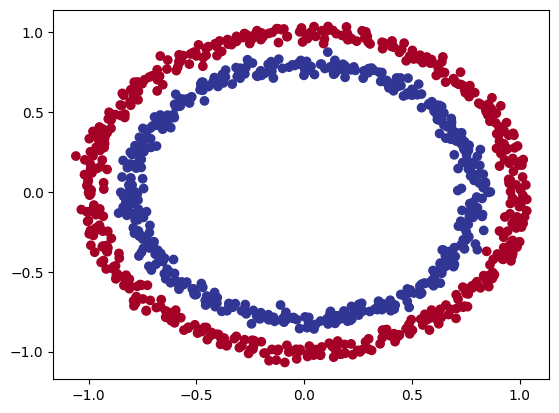

In [15]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes
One of the most common issues you'll run into when building neural networks is shape mismatches.

In [16]:
#Check the sape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

This means out neural network input shape will has to accept a tensor with at least one dimension being two adn output a tensor with at least one value.

## Steps in modelling

In TensorFlow, there are 3 foundamental steps to create and training a model. 

1. **Creating a model**: The model can be modularly built using the functional or sequential API
* An aleready built model could be imported

2. **Compiling a model**: Definition of the performance metrics and optimizers.
3. **Fitting the model**: Let the model try to find patterns in the data

In [17]:
# Set a random seed for reprodicibility
tf.random.set_seed(42)

# Create model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
]) 

# Compile the model 
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), #binary since we're working with 2 classes(0 & 1)
               optimizer= tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# Fit the model
model_1.fit(X, y, epochs=100)

Epoch 1/100
 1/32 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.4375 - loss: 7.2662

2026-02-13 10:11:05.607529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4730 - loss: 5.1360
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4700 - loss: 4.5023
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4810 - loss: 3.0939
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4960 - loss: 0.7706
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 0.7160
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 0.7020
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5030 - loss: 0.6973
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4940 - loss: 0.6956
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 0.6949
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4710 - loss: 0.6946
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4600 - loss: 0.6945
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4500 - lo

In [18]:
#Train the model for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4730 - loss: 0.6933


[0.6932878494262695, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting arround 50% accuracy... it's performing as a random guess.
An improvement of the model is required

## Improve the model

#### Adding an aditional layer

In [19]:
# Set a random seed for reprodicibility
tf.random.set_seed(42)

# Create the model (Add another layer)
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#Fit the model
model_2.fit(X,y,epochs=100, verbose=0)
#Evaluate model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 7.9712


[7.971191883087158, 0.5]

The addition of a new layer doesn't improve the predictions of the model

#### Add extra layer and changing oprtimizer

In [20]:
# Set a random seed for reprodicibility
tf.random.set_seed(42)

# Create the model (Add another layer)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

#Fit the model
model_3.fit(X,y,epochs=100, verbose=0)

#Evaluate model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4850 - loss: 0.6948


[0.6947566270828247, 0.48500001430511475]

In [21]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

To visualize our model prediction, let's create a function to:
* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones

In [22]:
import numpy as np

In [23]:
#Create a function to visualite the models prediction
def plot_dec_bound(model, X, y):
    """ 
    Plots the decision boundary created by a model predicting on X
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1 , X[:,1].max() - 0.1

    # Create meshgrid
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

    #Make predictions 
    y_pred = model.predict(x_in)

    #Check for multi-class
    if len(y_pred[0]) > 1: 
        print("Doing multiclass clasification")
        #We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmay(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step
Doing binary classification


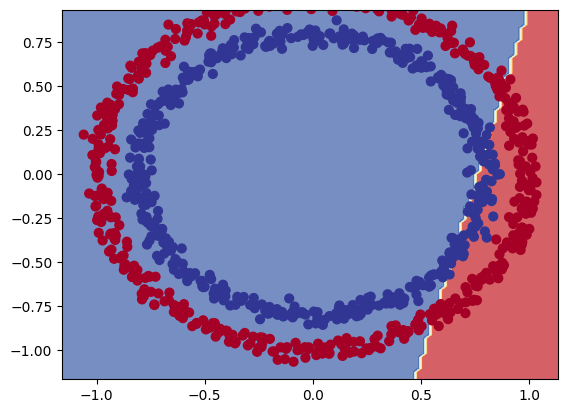

In [24]:
plot_dec_bound(model_2, X=X, y=y)

## The missing piece: Non-linearyty

In [25]:
# Set seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

#2. Compile model
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit model
history = model_4.fit(X,y, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
Doing binary classification


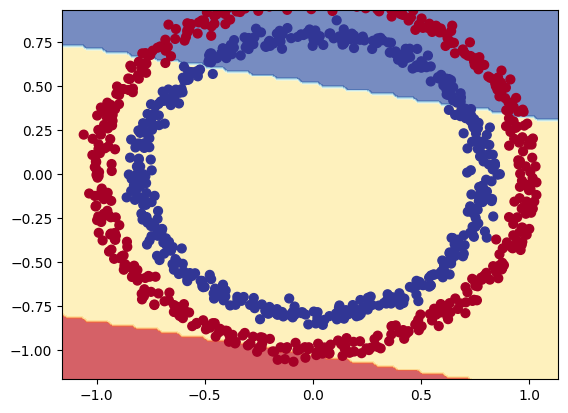

In [26]:
# Check the decision boundary for model_4
plot_dec_bound(model_4, X,y)

In [27]:
# Set seed
tf.random.set_seed(42)

#1. Create the model with non-linear activation 
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile model
model_5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5250 - loss: 0.6995
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4780 - loss: 0.6997
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4790 - loss: 0.6949
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5150 - loss: 0.6924
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5410 - loss: 0.6895
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5520 - loss: 0.6864
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5640 - loss: 0.6828
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5770 - loss: 0.6780
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6270 - loss: 0.6715
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6560 - loss: 0.6647
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6900 - loss: 0.6586
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Doing binary classification


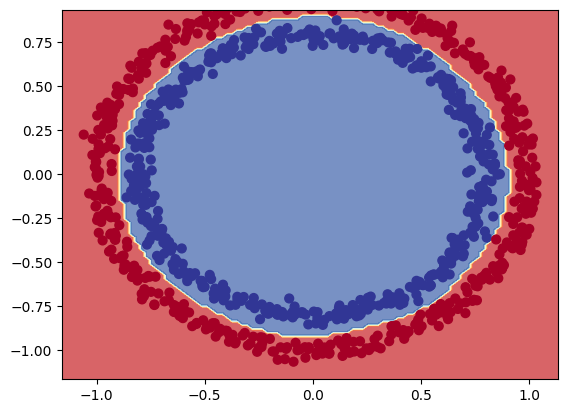

In [28]:
# Check the decision boundary for model_5
plot_dec_bound(model_5, X,y)

In [29]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0078


[0.007810525130480528, 1.0]

The combination of linear and non linear functions is one of the key foundamentals in neural networks.

In [30]:
# Split into train and test set

X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [31]:
# Set seed
tf.random.set_seed(42)

#1. Create the model with non-linear activation 
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(100, activation="tanh"),
    tf.keras.layers.Dense(10, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile model
model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit model
history = model_6.fit(X_train,y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4925 - loss: 0.6989
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4938 - loss: 0.6964
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5200 - loss: 0.6943
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5125 - loss: 0.6941
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5275 - loss: 0.6920
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5575 - loss: 0.6887
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5587 - loss: 0.6847
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5838 - loss: 0.6803
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5987 - loss: 0.6765
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.6732
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6062 - loss: 0.6701
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


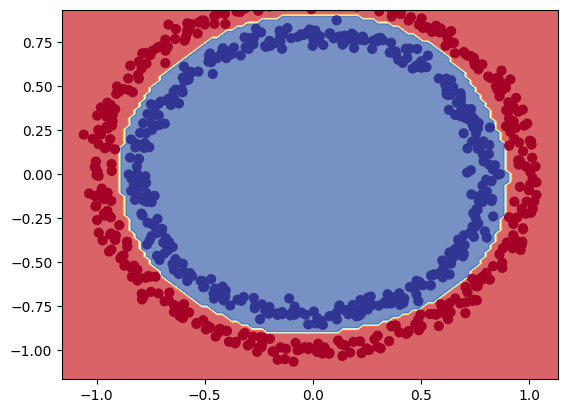

In [32]:
# Check the decision boundary for model_6
plot_dec_bound(model_6, X_train,y_train)

In [33]:
model_6.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0140


[0.014023995026946068, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


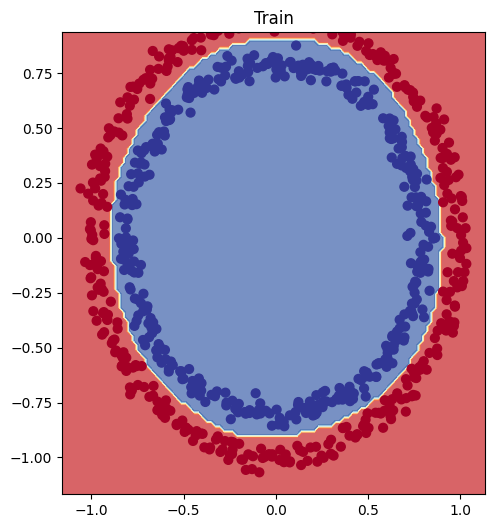

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


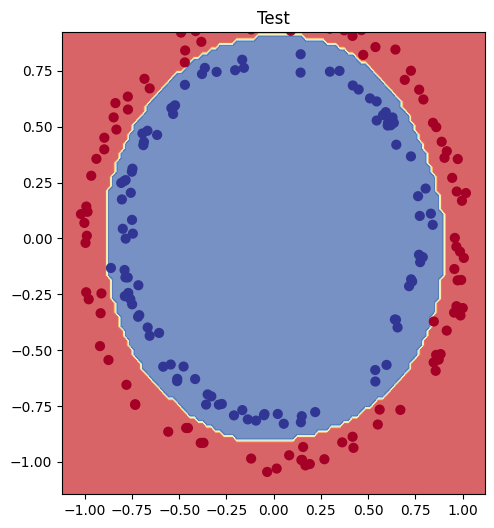

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_dec_bound(model_6, X_train,y_train)
plt.show();
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_dec_bound(model_6, X_test,y_test)
plt.show();

Text(0.5, 1.0, 'Model_6 loss curves')

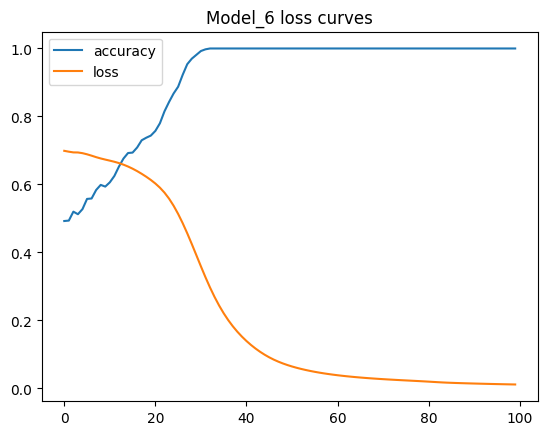

In [35]:
# Plot loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves")

For many problems the loss function going down means the model is improving (the prediction is )

## Finding the best learning rate

To find the ideal learning rate we're going to use the following steps:

* A learning rate callback
* Another model
* A modified loss curve plot

In [45]:
# Set random seed 
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation="tanh"),
    tf.keras.layers.Dense(10,activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
]) 

#2. Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_7 = model_7.fit(X_train,y_train, epochs= 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5163 - loss: 0.6928 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5225 - loss: 0.6926 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5175 - loss: 0.6926 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5275 - loss: 0.6925 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5225 - loss: 0.6925 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5300 - loss: 0.6925 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5300 - loss: 0.6925 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5275 - loss: 0.6925 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5312 - loss: 0.6925 - learning_

<Axes: xlabel='epochs'>

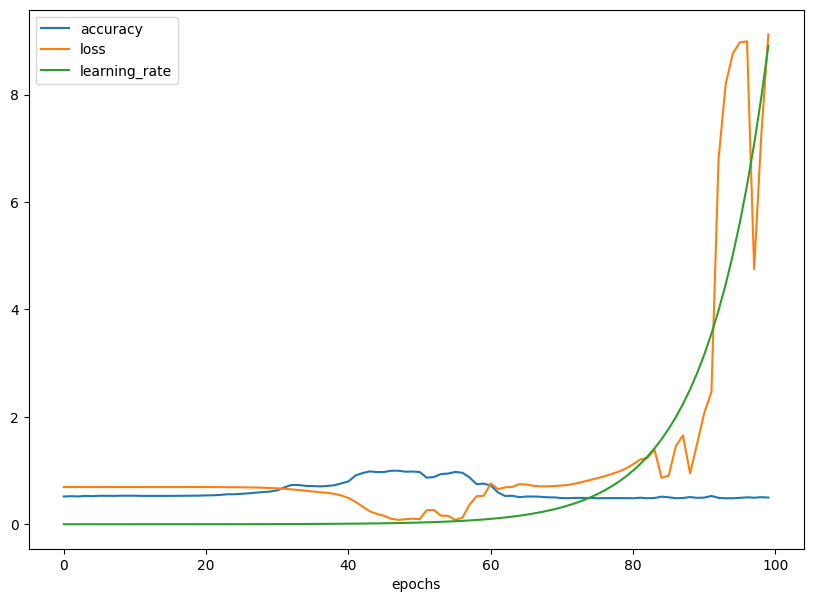

In [46]:
pd.DataFrame(history_7.history).plot(figsize=(10,7), xlabel= "epochs")